# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [24]:
url1 = "https://raw.githubusercontent.com/Mechnar9000/datafiles/main/indorain.csv"

In [25]:
rain = pd.read_csv(url1)

In [26]:
url2 = "https://raw.githubusercontent.com/Mechnar9000/datafiles/main/indotemp.csv"

In [27]:
temp = pd.read_csv(url2)

In [28]:
display(rain)

,Category,Annual Mean,5-yr smooth
0,1901,2780.28,2689.56
1,1902,2621.93,2746.08
2,1903,2864.34,2798.85
3,1904,2846.41,2844.07
4,1905,2766.05,2878.00
...,...,...,...
115,2016,3023.09,2797.36
116,2017,3105.07,2819.60
117,2018,2910.73,2864.23
118,2019,2587.65,2923.77


In [29]:
display(temp)

,Category,Annual Mean,5-yr smooth
0,1901,25.59,25.60
1,1902,25.56,25.58
2,1903,25.57,25.56
3,1904,25.55,25.54
4,1905,25.60,25.54
...,...,...,...
115,2016,26.42,26.31
116,2017,26.22,26.32
117,2018,26.23,26.33
118,2019,26.39,26.34


In [30]:
raintemp = pd.merge(rain, temp, on='Category')

In [31]:
display(raintemp)

,Category,Annual Mean_x,5-yr smooth_x,Annual Mean_y,5-yr smooth_y
0,1901,2780.28,2689.56,25.59,25.60
1,1902,2621.93,2746.08,25.56,25.58
2,1903,2864.34,2798.85,25.57,25.56
3,1904,2846.41,2844.07,25.55,25.54
4,1905,2766.05,2878.00,25.60,25.54
...,...,...,...,...,...
115,2016,3023.09,2797.36,26.42,26.31
116,2017,3105.07,2819.60,26.22,26.32
117,2018,2910.73,2864.23,26.23,26.33
118,2019,2587.65,2923.77,26.39,26.34


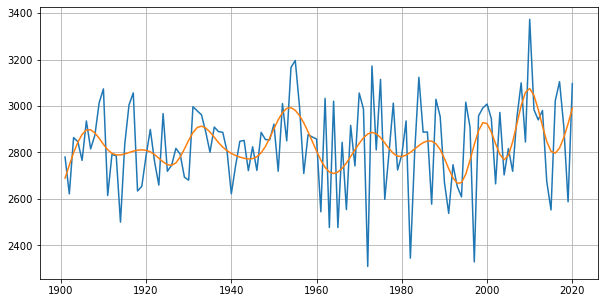

In [46]:
plt.plot(raintemp['Category'], raintemp['Annual Mean_x'])
plt.plot(raintemp['Category'], raintemp['5-yr smooth_x'])
plt.rcParams['figure.figsize'] = [10, 5]
plt.grid()
plt.show()

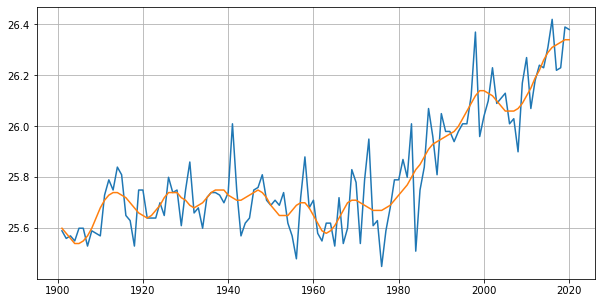

In [47]:
plt.plot(raintemp['Category'], raintemp['Annual Mean_y'])
plt.plot(raintemp['Category'], raintemp['5-yr smooth_y'])
plt.rcParams['figure.figsize'] = [10, 5]
plt.grid()
plt.show()

In [51]:
from scipy import stats

In [55]:
sp.stats.pearsonr(raintemp['Annual Mean_x'], raintemp['Annual Mean_y'])

(0.03808426529857053, 0.6796246497727877)

In [54]:
sp.stats.pearsonr(raintemp['5-yr smooth_x'], raintemp['5-yr smooth_y'])

(0.22857322722306292, 0.012038242503323117)

In [56]:
rxy = 0

xx = raintemp['5-yr smooth_x']

yy = raintemp['5-yr smooth_y']

num = 0
denom1 = 0
denom2 = 0

for x,y in zip(xx, yy):
    
    num += (x - np.mean(xx)) * (y - np.mean(yy))
    
    denom1 += (x - np.mean(xx))**2 
    denom2 += (y - np.mean(yy))**2
    
denom = np.sqrt(denom1) * np.sqrt(denom2)

print(num/denom)
    

    
    
    
    

0.2285732272230629
